#### Introduction:

Goal is to construct at least two different linear regression models that predict curb- weight based on the provided explanatory variables and evaluate them using K-fold cross validation

Here we have automobile data set containing different attributes which tells information about the automobile.
We are considering only the below given attributes or columns in the given project. 
Curb-weight is considered as response variable here where as explanatory variable is considered from the other given 8 attributes. 

Data dictonary:
1. wheel-base: continuous from 86.6 120.9. 
2. length: continuous from 141.1 to 208.1. 
3. width: continuous from 60.3 to 72.3. 
4. height: continuous from 47.8 to 59.8. 
5. curb-weight: continuous from 1488 to 4066. 
6. engine-size: continuous from 61 to 326. 
7. horsepower: continuous from 48 to 288. 
8. peak-rpm: continuous from 4150 to 6600. 
9. city-mpg: continuous from 13 to 49. 

Steps:
1. We will load the data and do some EDA work to gain some insights from the dataset. 
2. Depending upon the information we learn from EDA work we will select our explanatory variables 
3. Create 2 different models and evaluate them using K-fold cross validation.


In [39]:
# load the pandas and numpy libraries
import pandas as pd
import numpy as np 

# importing dataset from github. This data set contains information related to automobile
filename = "https://raw.githubusercontent.com/getfitwithapurv/datascience/main/M2_Data.csv"
df = pd.read_csv(filename)
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


In [43]:
# observations within the data set
len(df)

204

In [20]:
df #sanity check

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


#### Exploratory Data Analysis

In [21]:
# check for missing values
df.isnull().sum()

3              0
?              0
alfa-romero    0
gas            0
std            0
two            0
convertible    0
rwd            0
front          0
88.6           0
168.8          0
64.1           0
48.8           0
2548           0
dohc           0
four           0
130            0
mpfi           0
3.47           0
2.68           0
9              0
111            0
5000           0
21             0
27             0
13495          0
dtype: int64

there are no missing values in the dataset

In [22]:
# from the domain knowledge changing the column names for better understanding
df.columns = [' symboling','normalized-losses','make','fuel-type',' aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','no-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [23]:
df #sanity check

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [24]:
# checking datatype and null values of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0    symboling         204 non-null    int64  
 1   normalized-losses  204 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4    aspiration        204 non-null    object 
 5   num-of-doors       204 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  no-of-cylinders    204 non-null    object 
 16  engine-size        204 non

dataset has 204 rows and 26 columns and many columns are object datatype which need to changed to float or int.

In [25]:
# from the sanity check we saw that normalized losses column has '?' which is showing non null. Hence changing it to 0
df = df.replace('?',0)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [26]:
# convert 'horsepower' and 'peak-rpm' columns to integer as they were object datatype and 
# we might use them in future as explanatory variable 
df[['horsepower', 'peak-rpm']] = df[['horsepower', 'peak-rpm']].astype(str).astype(int)

In [27]:
# basic descriptive values of the dataset
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,103.200980,5075.735294,25.240196,30.769608
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,40.929277,696.339443,6.551513,6.898337
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,0.000000,0.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,116.000000,5500.000000,30.000000,34.500000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,288.000000,6600.000000,49.000000,54.000000


In [28]:
# check for missing curb weight values which is response variable
df['curb-weight'].isnull().sum() #no missing value in curb weight

0

In [29]:
# now creating new dataset with the required columns 
df0 = df[['curb-weight', 'height', 'width', 'length', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg']].copy()
df0

,curb-weight,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg
0,2548,48.8,64.1,168.8,88.6,130,111,5000,21
1,2823,52.4,65.5,171.2,94.5,152,154,5000,19
2,2337,54.3,66.2,176.6,99.8,109,102,5500,24
3,2824,54.3,66.4,176.6,99.4,136,115,5500,18
4,2507,53.1,66.3,177.3,99.8,136,110,5500,19
...,...,...,...,...,...,...,...,...,...
199,2952,55.5,68.9,188.8,109.1,141,114,5400,23
200,3049,55.5,68.8,188.8,109.1,141,160,5300,19
201,3012,55.5,68.9,188.8,109.1,173,134,5500,18
202,3217,55.5,68.9,188.8,109.1,145,106,4800,26


<AxesSubplot:>

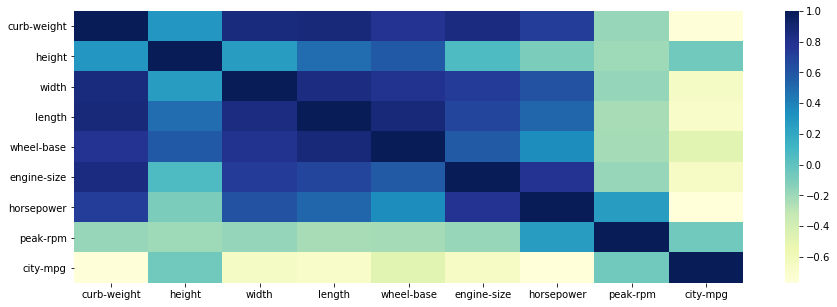

In [35]:
# for importing seaborn and matplotlib pyplot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
sns.heatmap(df0.corr(), cmap="YlGnBu")
# plotting a heatmap to see correlation between response variable and our selected explanatory variables

Here we can see curb weight is highly correlated with 'width', 'length', 'engine-size' and also with 'horsepower' and 'wheel-base'. So we will select our explanatory variables from these. 

In [15]:
# creating a dataset of all other attributes except our response variable which is curb-weight
df1 = df[['height', 'width', 'length', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'city-mpg']].copy()

In [81]:
df1 #sanity check

,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg
0,48.8,64.1,168.8,88.6,130,111,5000,21
1,52.4,65.5,171.2,94.5,152,154,5000,19
2,54.3,66.2,176.6,99.8,109,102,5500,24
3,54.3,66.4,176.6,99.4,136,115,5500,18
4,53.1,66.3,177.3,99.8,136,110,5500,19
...,...,...,...,...,...,...,...,...
199,55.5,68.9,188.8,109.1,141,114,5400,23
200,55.5,68.8,188.8,109.1,141,160,5300,19
201,55.5,68.9,188.8,109.1,173,134,5500,18
202,55.5,68.9,188.8,109.1,145,106,4800,26


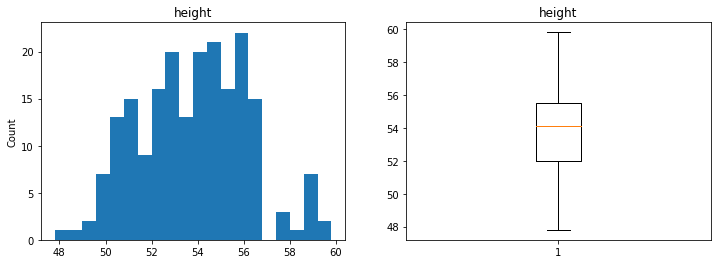

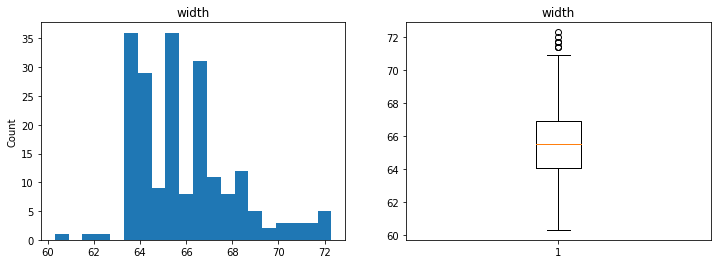

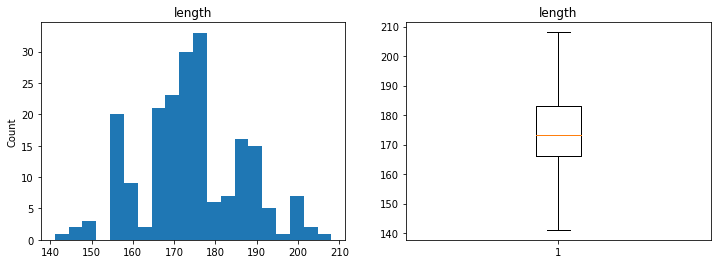

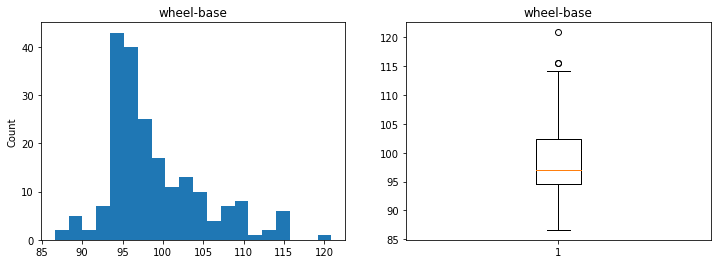

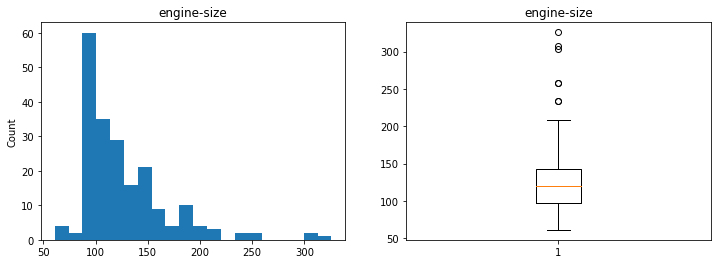

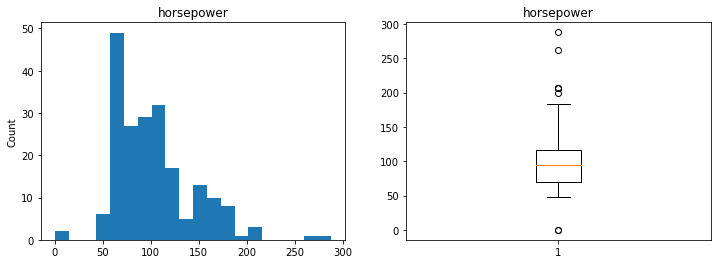

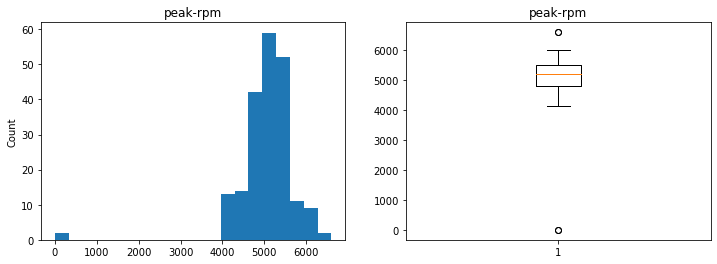

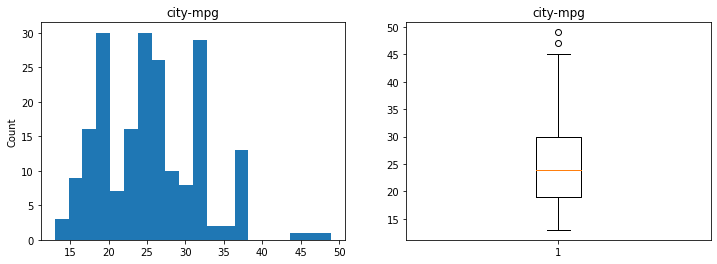

In [36]:
# for each column, create a histogram and boxplot side by side
for i in range(0,8):
    figure, axis = plt.subplots(1, 2,figsize=(12,4))
    a=df1.iloc[:,i]
    axis[0].hist(a, bins=20)
    axis[0].set_title(df1.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(df1.columns[i])
    plt.show()

Here we can observe that engine size is right skewed and peak-rpm is left skewed. 
Also, there is an outlier in peak-rpm

<AxesSubplot:>

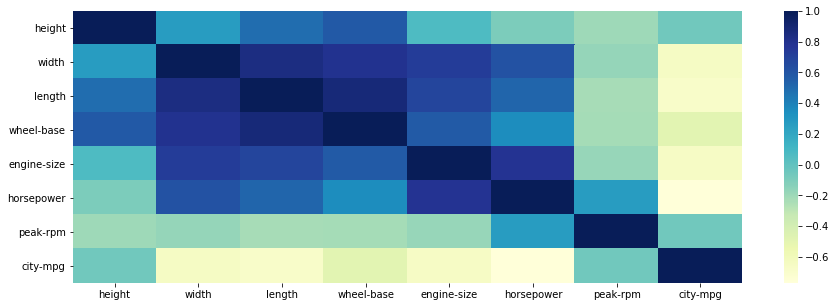

In [38]:
plt.figure(figsize = (15,5))
sns.heatmap(df1.corr(),cmap="YlGnBu") 
# heatmap to see correlation between the explanatory variables

We can observe that width is highly correlated with length and wheelbase. 
Engine size is highly correlated with horsepower and width. 
We can use these observations for selecting our explanatory variables for models.

### Regression Model Construction & Evaluation

Firstly we will split the dataset into explanatory variables group X and response variable y.

In [58]:
X = df1  
X

,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg
0,48.8,64.1,168.8,88.6,130,111,5000,21
1,52.4,65.5,171.2,94.5,152,154,5000,19
2,54.3,66.2,176.6,99.8,109,102,5500,24
3,54.3,66.4,176.6,99.4,136,115,5500,18
4,53.1,66.3,177.3,99.8,136,110,5500,19
...,...,...,...,...,...,...,...,...
199,55.5,68.9,188.8,109.1,141,114,5400,23
200,55.5,68.8,188.8,109.1,141,160,5300,19
201,55.5,68.9,188.8,109.1,173,134,5500,18
202,55.5,68.9,188.8,109.1,145,106,4800,26


In [59]:
y = df[['curb-weight']].copy()
y

,curb-weight
0,2548
1,2823
2,2337
3,2824
4,2507
...,...
199,2952
200,3049
201,3012
202,3217


In [60]:
# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Now split the data into training and testing subsets. 
# We'll set aside 30% of the data for testing purposes; 
# Rnadom state is kept to 12 to have the ability to reproduce the exact same training and testing subsets repeatedly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [61]:
len(X_train) #70% observations for training

142

In [62]:
len(X_test) #30% observations for testing 

62

In [63]:
# checking the indices of the new objects
y_test.head()

,curb-weight
196,3042
31,1837
6,2954
61,2410
153,2290


In [64]:
# checking the indices of the new objects
X_test.head()

,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg
196,57.5,67.2,188.8,104.3,141,114,5400,24
31,52.6,64.0,150.0,93.7,79,60,5500,38
6,55.7,71.4,192.7,105.8,136,110,5500,19
61,55.5,66.5,177.8,98.8,122,84,4800,26
153,59.1,63.6,169.7,95.7,92,62,4800,27


In [65]:
X_train.head()

,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg
187,55.7,65.5,171.7,97.3,109,100,5500,26
45,51.4,65.2,172.6,96.0,119,90,5000,24
138,53.7,63.6,157.9,93.7,108,73,4400,26
33,52.6,64.0,150.0,93.7,92,76,6000,30
192,55.1,66.9,183.1,100.4,109,88,5500,25


In [66]:
y_train.head()

,curb-weight
187,2300
45,2734
138,2120
33,1956
192,2563


### Cross validation

1st model : We are considering engine size, width and length as our explanatory variables for this model

In [83]:
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

# create a new dataframe containing only selected explanatory variables
newX_train = X_train[['engine-size','width','length']].copy()

# sanity check
newX_train.head()

,engine-size,width,length
187,109,65.5,171.7
45,119,65.2,172.6
138,108,63.6,157.9
33,92,64.0,150.0
192,109,66.9,183.1


In [84]:
model = LinearRegression() #parameter for cross validation model

# fit the model using 5-fold cross validation 

scores = cross_val_score(model, newX_train, y_train, cv=5)

# printing the R^2 metrics derived from the K-fold cross validation of this linear regression model
print (scores)

[0.91099696 0.91507673 0.80954485 0.86279561 0.9229624 ]


In [85]:
# calculating the average R^2 across all 5 folds
np.mean(scores)

0.884275311756285

1st model has 88.4% accuracy 

2nd model :
We are considering engine size, width and horsepower as our explanatory variables for this model

In [ ]:
# create a new dataframe containing only the DepDelay and TaxiOut variables (our explanatory variables for the linear
# regression model)
newX_train1 = X_train[['engine-size','horsepower','width']].copy()

# sanity check
newX_train1.head()

In [101]:
model1 = LinearRegression()

scores1 = cross_val_score(model1, newX_train1, y_train, cv=5)

# printing the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores)

[0.87084936 0.89932331 0.73274996 0.84876932 0.78683691]


In [102]:
# calculating the average R^2 across all 5 folds
np.mean(scores1)

0.8277057724136261

2nd model as accuracy of 82.7%

### Conclusion : 
From the above two models it can observed that model 1 gives better results. It has egine size, width and length as explanatory variables. It resonates with our EDA results since these variables are hgihly correlated with curb-weight. Hence this model will predict curb-weight better compared to 2nd model which has accuracy of 82.7%

References:
1. https://www.python-graph-gallery.com/heatmap/
2. Prof. Topor's notebook (lecture notes)
3. https://towardsdatascience.com/k-fold-cross-validation-explained-in-plain-english-659e33c0bc0
4. https://archive.ics.uci.edu/ml/datasets/Automobile